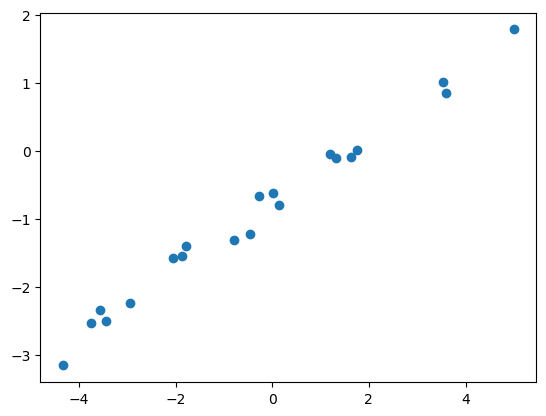

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 data points
N = 20
# Random data on x-axis
X = np.random.rand(N) * 10 - 5
Y = 0.5 * X - 1 + 0.5*np.random.rand(N)


plt.scatter(X,Y)

In [2]:


# Convert data to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_train = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Initialize m and b as PyTorch parameters
m = torch.randn(1, requires_grad=True, dtype=torch.float32)  # Random initialization for m
b = torch.randn(1, requires_grad=True, dtype=torch.float32)  # Random initialization for b

# Define optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD([m, b], lr=learning_rate)  # Optimizer for m and b

# Training loop
epochs = 1000
for epoch in range(epochs):

    optimizer.zero_grad()  # Clear gradients
    
    # Forward pass: Calculate y_pred using y = mx + b
    y_pred = m * X_train + b
    # Calculate Mean Squared Error (MSE) Loss
    loss = torch.mean((y_pred - Y_train) ** 2)
    
    # Backward pass: Compute gradients
  
    loss.backward()  # Calculate new gradients
    
    # Update parameters using optimizer1
    optimizer.step()
    
    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Estimated m:", m.item())
print("Estimated b:", b.item())


Epoch [100/1000], Loss: 0.0752
Epoch [200/1000], Loss: 0.0240
Epoch [300/1000], Loss: 0.0230
Epoch [400/1000], Loss: 0.0230
Epoch [500/1000], Loss: 0.0230
Epoch [600/1000], Loss: 0.0230
Epoch [700/1000], Loss: 0.0230
Epoch [800/1000], Loss: 0.0230
Epoch [900/1000], Loss: 0.0230
Epoch [1000/1000], Loss: 0.0230
Estimated m: 0.48729196190834045
Estimated b: -0.7519025206565857


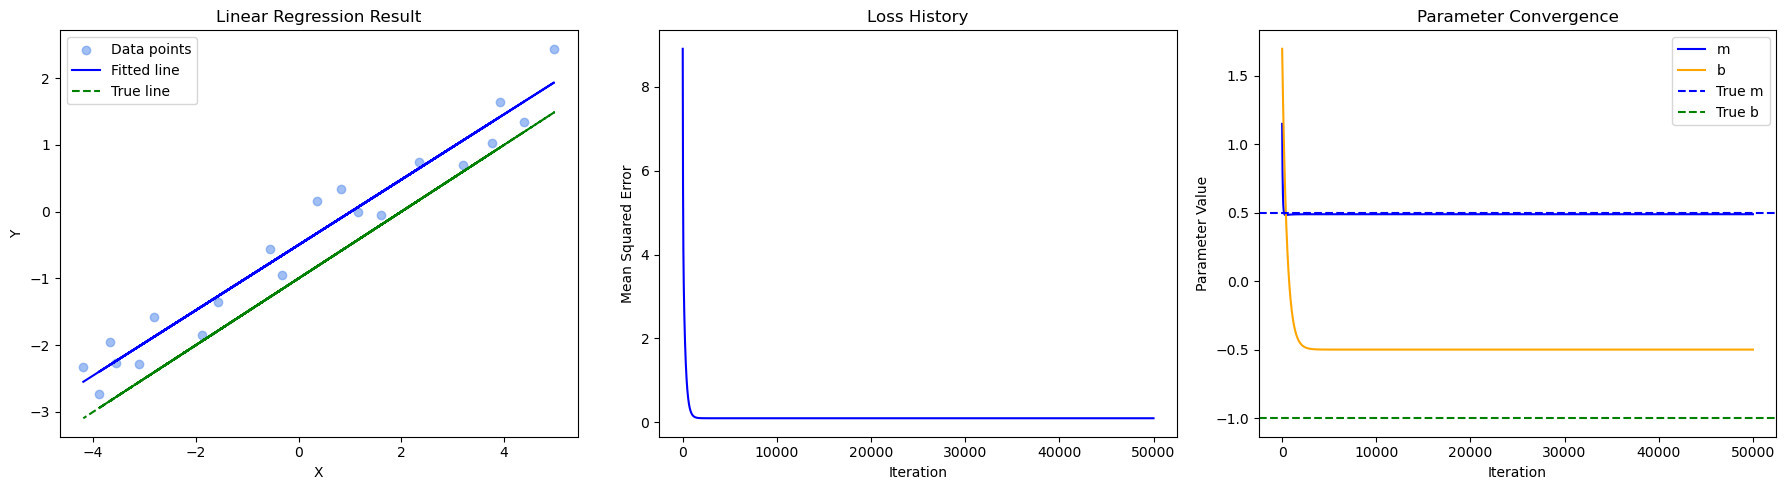

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 data points
N = 20
X = np.random.rand(N) * 10 - 5
Y_true = 0.5 * X - 1  # True line
Y = Y_true + np.random.rand(N)  # Adding some noise to the true line

# Convert data to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_train = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Initialize m and b as PyTorch parameters
m = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

# Define optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD([m, b], lr=learning_rate)

# Training loop with data recording for plots
epochs = 50000
loss_history = []
m_values, b_values = [], []

for epoch in range(epochs):
    # Forward pass
    y_pred = m * X_train + b
    
    # Calculate Mean Squared Error (MSE) Loss
    loss = torch.mean((y_pred - Y_train) ** 2)
    loss_history.append(loss.item())
    m_values.append(m.item())
    b_values.append(b.item())
    
    # Backward pass and parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression Result Plot
axs[0].scatter(X, Y, color="cornflowerblue", alpha=0.6, label="Data points")
axs[0].plot(X, m.item() * X + b.item(), color="blue", label="Fitted line")
axs[0].plot(X, 0.5 * X - 1, 'g--', label="True line")
axs[0].set_title("Linear Regression Result")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].legend()

# Loss History Plot
axs[1].plot(range(epochs), loss_history, color="blue")
axs[1].set_title("Loss History")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Mean Squared Error")

# Parameter Convergence Plot
axs[2].plot(range(epochs), m_values, label="m", color="blue")
axs[2].plot(range(epochs), b_values, label="b", color="orange")
axs[2].axhline(y=0.5, color="blue", linestyle="--", label="True m")
axs[2].axhline(y=-1, color="green", linestyle="--", label="True b")
axs[2].set_title("Parameter Convergence")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Parameter Value")
axs[2].legend()

plt.tight_layout()
plt.show()
